# Models and Mechanisms for Fairness in Location Data Processing


### Author: Sina Shaham, Gabriel Ghinita, Cyrus Shahabi


### Link to Publication: https://scholar.google.com.au/citations?view_op=view_citation&hl=en&user=WnWN4NkAAAAJ&sortby=pubdate&citation_for_view=WnWN4NkAAAAJ:qxL8FJ1GzNcC


### The following use the Chicago Crime dataset for the evaluation of c-fair polynomials in the DtR problem

In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import rand
from scipy.optimize import lsq_linear
import time
from matplotlib import pyplot as plt
%matplotlib inline


### The output scores of the model in addition to grid cells of the datapoints are stored in the following file. 

In [3]:
taxi_fairs = pd.read_csv("SS_Chicago_Scores.csv",)

In [4]:
del taxi_fairs['Unnamed: 0']

In [5]:
taxi_fairs.head()


,gridY,gridX,PredictedScore
0,0,0,0.022403
1,0,1,0.022403
2,0,2,0.022403
3,0,3,0.022403
4,0,4,0.022403


In [6]:
taxi_fairs = taxi_fairs.to_numpy()
y_axis = taxi_fairs[:,0]
x_axis = taxi_fairs[:,1]
PreScores = taxi_fairs[:,2]

mem = np.max(y_axis)
y_axis = y_axis/mem
mem = np.max(x_axis)
x_axis = x_axis/mem

### The following calculates the percentage of unfairness in the whole dataset before applying the c-fair polynomials.

In [7]:
def Euclidean_distance(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2 +(y1-y2)**2)

"""
here you have everything you need in a normalized fasion.
"""


UpperLimit = 1024
mem_y_axis = y_axis[:UpperLimit]
mem_x_axis = x_axis[:UpperLimit]
mem_score = PreScores[:UpperLimit]

diff = []
counter = 0

for i in range(UpperLimit):
    for j in range(i+1,UpperLimit):

        if np.abs(mem_score[i]- mem_score[j])>  Euclidean_distance(mem_x_axis[i],mem_y_axis[i],mem_x_axis[j],mem_y_axis[j]):     
            counter+=1
            mem = np.abs( Euclidean_distance(mem_x_axis[i],mem_y_axis[i],mem_x_axis[j],mem_y_axis[j]) -np.abs(mem_score[i]- mem_score[j])  )
            diff.append(mem)

mem = UpperLimit*(UpperLimit-1)/2

print(f"Total comparison: {mem}  unfair comparisons {counter}")
print(f"unfairness percentage  {(counter/mem)*100}")
diff= np.array(diff)
print(np.average(diff))
print(np.var(diff))


Total comparison: 523776.0  unfair comparisons 235465
unfairness percentage  44.95528622922776
0.42066512571538844
0.04151637123511464


# Here is where the main code starts


 Upper bound [       inf 0.0087108  0.0174216  0.0261324  0.03484321 0.04355401
 0.05226481 0.06097561 0.06968641 0.07839721 0.08710801 0.09581882
 0.10452962 0.11324042 0.12195122 0.13066202 0.13937282 0.14808362
 0.15679443 0.16550523 0.17421603 0.00615947 0.01231893 0.0184784
 0.02463787 0.03079733 0.0369568  0.04311627 0.04927573 0.0554352
 0.06159467 0.06775413 0.0739136  0.08007307 0.08623253 0.092392
 0.09855147 0.10471093 0.1108704  0.11702987 0.12318933]
The relative change of the cost function is less than `tol`.
Number of iterations 46, initial cost 2.9755e+02, final cost 1.0017e+02, first-order optimality 1.15e-09.
here is the maximum  difference 0.13630821307247648
Total comparison: 523776.0  unfair comparisons 0
unfairness percentage  0.0
the RMS for n = 20 is 0.5936813273063714
 Upper bound [       inf 0.0174216  0.03484321 0.05226481 0.06968641 0.08710801
 0.10452962 0.12195122 0.13937282 0.15679443 0.17421603 0.19163763
 0.20905923 0.22648084 0.24390244 0.26132404 0.27

Total comparison: 523776.0  unfair comparisons 13054
unfairness percentage  2.492286779081134
the RMS for n = 30 is 0.4450868422996213
 Upper bound [       inf 0.00793231 0.01586462 0.02379693 0.03172924 0.03966155
 0.04759387 0.05552618 0.06345849 0.0713908  0.07932311 0.08725542
 0.09518773 0.10312004 0.11105235 0.11898466 0.12691698 0.13484929
 0.1427816  0.15071391 0.15864622 0.16657853 0.17451084 0.18244315
 0.19037546 0.19830777 0.20624008 0.2141724  0.22210471 0.23003702
 0.23796933 0.00560899 0.01121798 0.01682697 0.02243596 0.02804495
 0.03365395 0.03926294 0.04487193 0.05048092 0.05608991 0.0616989
 0.06730789 0.07291688 0.07852587 0.08413486 0.08974385 0.09535284
 0.10096184 0.10657083 0.11217982 0.11778881 0.1233978  0.12900679
 0.13461578 0.14022477 0.14583376 0.15144275 0.15705174 0.16266073
 0.16826973]
The first-order optimality measure is less than `tol`.
Number of iterations 68, initial cost 2.9820e+02, final cost 9.9915e+01, first-order optimality 1.28e-12.
here is t

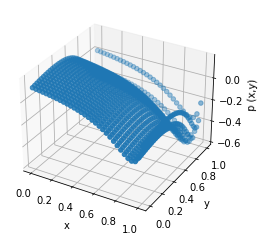

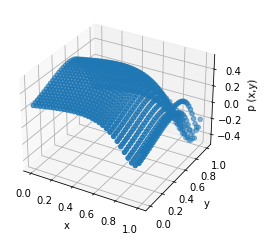

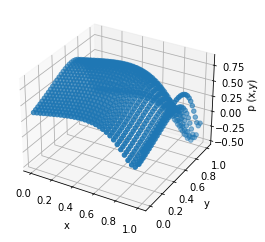

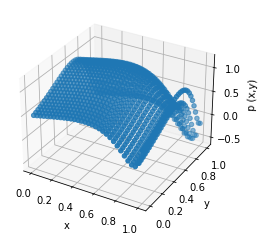

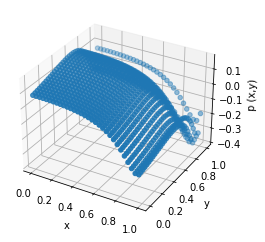

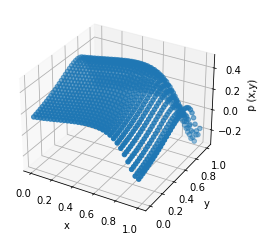

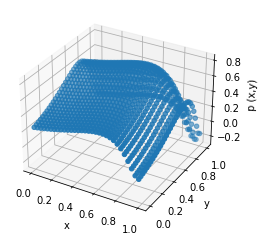

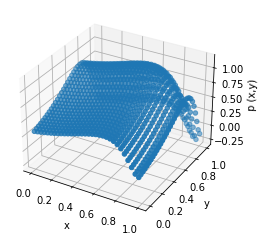

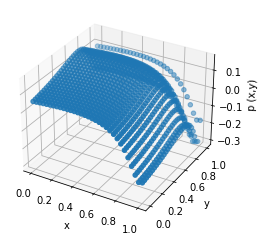

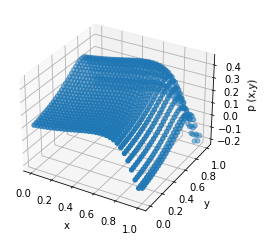

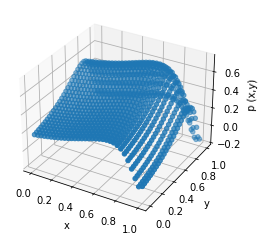

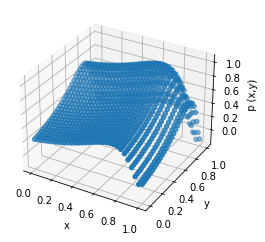

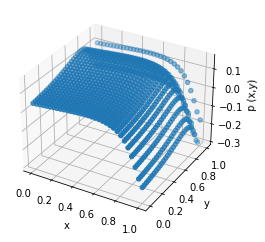

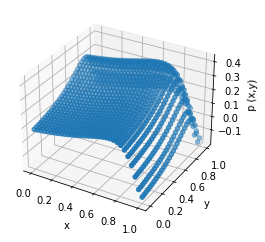

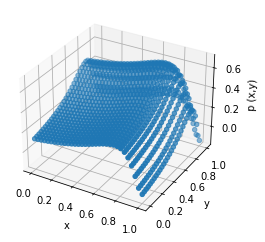

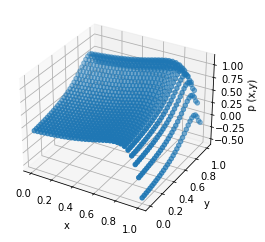

In [10]:
import random

def Cal_error_Euclidean(mem_y_axis, mem_x_axis, p_x_y ):
    counter = 0
    UpperLimit = len(mem_y_axis)
    
    for i in range(UpperLimit):
        for j in range(i+1,UpperLimit):
            if np.abs(p_x_y[i]- p_x_y[j])>  Euclidean_distance(mem_x_axis[i],mem_y_axis[i],mem_x_axis[j],mem_y_axis[j]):#+0.000001:     
                counter+=1

    mem = UpperLimit*(UpperLimit-1)/2

    print(f"Total comparison: {mem}  unfair comparisons {counter}")
    print(f"unfairness percentage  {(counter/mem)*100}")
    return (counter/mem)*100
    
    
computation_complexity = []
RMS = []
for n in [20,25,30,35]:
    
    b = mem_score
    A= []
    for i in range(UpperLimit): 
        mem=[]
        mem.append(1)
        
        for j in range(1,n+1):
            mem.append(mem_x_axis[i]**j)
        for j in range(1,n+1):
            mem.append(mem_y_axis[i]**j)        
        A.append(mem)

        
    A = np.array(A)
    computation_complexity_mem = []
    RMS_mem = []
    
    _temp = []

    for c in [25,50,75,100]:
        start_time = time.time()
        ub = [np.inf]
        for i in range(1,n+1):
            ub.append(6*i*c*np.sqrt(2)/(n*(n+1)*(2*n+1)*np.sqrt(2)))
        for i in range(1,n+1):
            ub.append(6*i*c/(n*(n+1)*(2*n+1)*np.sqrt(2)))
        ub = np.array(ub)
        print(f" Upper bound {ub}")
        lb = -ub

        res = lsq_linear(A, b, bounds=(lb, ub), lsmr_tol='auto', verbose=1)

        """
        So far you have solved the problem and found the coefficients
        """

        coefficients = res.x[::-1]
        from numpy import polynomial

        coef_array = np.zeros((n+1,n+1))
        for i in range(n+1):
            coef_array[0][i] = coefficients[i]
            
        for i in range(1,n+1):
            coef_array[i][0] = coefficients[n+i]
            
        p_x_y = polynomial.polynomial.polyval2d(mem_x_axis, mem_y_axis, coef_array)
        end_time = time.time()
        

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter(mem_y_axis, mem_x_axis, p_x_y)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('p (x,y)')        

        print(f'here is the maximum  difference {max((p_x_y-b))}')
        
        for idx,i in enumerate(p_x_y):
            if i>=1:
                p_x_y[idx]=1
            elif i<=0:
                p_x_y[idx]=0
        
        RMS_mem.append(   [c, np.sqrt(np.mean((p_x_y-b)**2)), Cal_error_Euclidean(mem_y_axis, mem_x_axis, p_x_y )]   )
        computation_complexity_mem.append([c, end_time-start_time, res.cost, res.nit])
        print(f'the RMS for n = {n} is { np.sqrt(np.mean((p_x_y-b)**2))   }')

    RMS.append(RMS_mem)
    computation_complexity.append(computation_complexity_mem)
        



# Percentage of Unfairness VS c

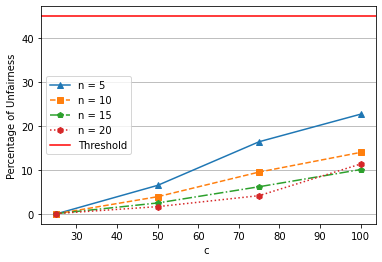

In [12]:

fig, axs = plt.subplots(1,figsize=(6,4))
markers=['^', 's', 'p', 'h', '8']
lines = ["-","--","-.",":"]
for idx,i in enumerate(RMS):
    c_array = [i[j][0] for j in range(len(i))]
    PoE_array = [i[j][2] for j in range(len(i))]
    axs.plot(c_array,PoE_array, marker=markers[idx], linestyle=lines[idx], label = f'n = {(idx+1)*5}')
    #axs[0].set_xscale('log')
    axs.set_xlabel(' c  ')
    axs.set_ylabel('Percentage of Unfairness')
    
    
axs.grid(axis = 'y')
axs.axhline(y=45, color='r', linestyle='-',label  = 'Threshold')
axs.legend()

    
fig.savefig("Chicago_PoE_vs_c_Paper.pdf", bbox_inches='tight')

# Percentage of Unfairness VS n

<ipython-input-15-3b58399eef46>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels([i for i in range(10,41,5)])


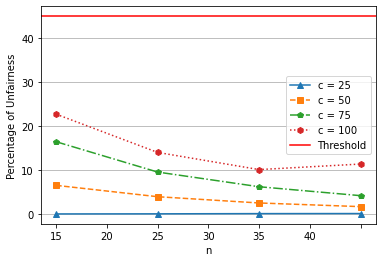

In [15]:
c_array = [i[0] for i in RMS[0]]
fig, axs = plt.subplots(1,figsize=(6,4))

markers=['^', 's', 'p', 'h', '8']
lines = ["-","--","-.",":"]



for idx,c in enumerate(c_array):
    
    PoE_array =  [i[idx][2] for i in RMS]
    n_array = [int(2*j) for j in range(1,len(RMS)+1)]
    axs.plot(n_array,PoE_array,marker=markers[idx], linestyle=lines[idx], label = f'c = {(idx+1)*25}')
    #axs[idx].set_xscale('log')
    axs.set_xlabel('n')
    axs.set_ylabel('Percentage of Unfairness')
    #axs.set_yscale('log')


    
axs.grid(axis = 'y')

#axs.set_yticklabels([i for i in range(20,110,20)])
axs.set_xticklabels([i for i in range(10,41,5)])
axs.axhline(y=45, color='r', linestyle='-',label  = 'Threshold')
axs.legend()

fig.savefig("Chicago_PoE_vs_n_Paper.pdf", bbox_inches='tight')

# FittingError vs n

<ipython-input-18-5f56a3c7117a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels([i for i in range(10,45,5)])


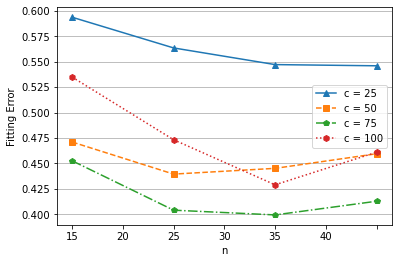

In [18]:
c_array = [i[0] for i in RMS[0]]
fig, axs = plt.subplots(1,figsize=(6,4))


markers=['^', 's', 'p', 'h', '8']
lines = ["-","--","-.",":"]

for idx,c in enumerate(c_array):
    
    fitting_error =  [i[idx][1] for i in RMS]
    n_array = [j for j in range(1,len(RMS)+1)]
    axs.plot(n_array,fitting_error,marker=markers[idx], linestyle=lines[idx], label = f'c = {(idx+1)*25}')
    axs.set_xlabel('n')
    axs.set_ylabel('Fitting Error')

axs.grid(axis = 'y')    
axs.set_xticklabels([i for i in range(10,45,5)])
axs.legend()
                        
#fig.savefig("Chicago_FittingError_vs_n_Paper.pdf", bbox_inches='tight')


# Fitting Error VS c

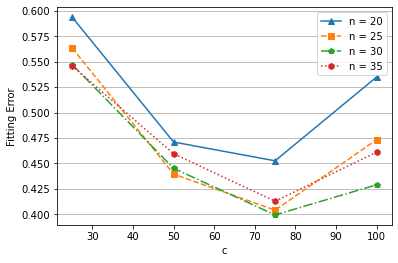

In [23]:
fig, axs = plt.subplots(1,figsize=(6,4))
markers=['^', 's', 'p', 'h', '8']
lines = ["-","--","-.",":"]


for idx,i in enumerate(RMS):
    c_array = [i[j][0] for j in range(len(i))]
    fitting_error =  [i[j][1] for j in range(len(i))]
    axs.plot(c_array,fitting_error, marker=markers[idx], linestyle=lines[idx], label = f'n = {(idx)*5+20}')    
    #axs.set_xscale('log')
    axs.set_xlabel('c')
    axs.set_ylabel('Fitting Error')
    
axs.grid(axis = 'y')
axs.legend()

#fig.savefig("Chicago_FittingError_vs_c_Paper.pdf", bbox_inches='tight')